**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [160]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [161]:
# Ваш код здесь
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [162]:
# Ваш код здесь
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [164]:
import numpy as np

X = np.array(adver_data.iloc[:,0:3])
y = np.array(adver_data.iloc[:,3])

In [165]:
X.shape

(200, 3)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [166]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

In [168]:
X = (X - means)/stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [170]:
import numpy as np
X = np.hstack((X, (np.ones(X.shape[0])).reshape(200,1))) # Ваш код здесь

In [171]:
X[0,:]

array([0.96985227, 0.98152247, 1.77894547, 1.        ])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [355]:
y_pred =  linear_prediction(X, norm_eq_weights)

In [172]:
def mserror(y, y_pred):
    return np.sum((y - y_pred)**2)/len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [173]:
mserror(adver_data.Sales, adver_data.Sales.median())

28.34575

In [174]:
np.sum((adver_data.Sales - adver_data.Sales.median())**2)/len(adver_data)

28.34575

In [175]:
answer1 = mserror(adver_data.Sales, adver_data.Sales.median())
print(round(answer1, 3))

28.346


In [115]:
!echo '28.346'>1.txt

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [531]:
X.T.shape

(4, 200)

In [506]:
np.dot((np.dot((np.dot(X.T, X)*-1), X.T)),y)

array([-172107.11939183, -145709.94855082,  -99227.64127745,
       -560900.000453  ])

In [176]:
def linear_prediction(X, w):
    return np.dot(X, w)

def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X), y)
#    return np.linalg.inv  # Ваш код здесь

In [509]:
norm_eq_weights = normal_equation(X, y)

In [511]:
d[np.newaxis,:].dot(norm_eq_weights)

array([14.02250001])

In [108]:
!echo '14.022' > 2.txt

In [109]:
!cat 2.txt

14.022


In [107]:

d = np.array([0., 0., 0., 1.]) #при нулевых значениях масштабированных признаков TV, Radio и Newspaper

answer2 = np.around( linear_prediction(d[np.newaxis, :], norm_eq_weights)[0], decimals = 3 )

print(answer2)

14.022


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [514]:
np.mean(X,axis=0)

array([ 1.22124533e-16, -4.52970994e-16,  2.22044605e-16,  1.00000000e+00])

In [517]:
d= np.array([0.,0.,0.,1.])

In [518]:
d[np.newaxis,:]

array([[0., 0., 0., 1.]])

In [520]:
linear_prediction(d[np.newaxis,:], norm_eq_weights)[0]

14.02250001132488

In [515]:

answer2 = linear_prediction(np.mean(X,axis=0), norm_eq_weights)
print(round(answer2, 3))

14.023


In [516]:
!cat 2.txt

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [124]:

print(norm_eq_weights.shape)
print(X.shape)
(np.sum(X*norm_eq_weights, axis=1)).shape

(4,)
(200, 4)


(200,)

In [371]:
def linear_prediction(X, w):
    return np.dot(X, w)
def linear_prediction2(X, w):
    return np.sum(X*w, axis=1)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [127]:
answer3 = mserror(adver_data.Sales, linear_prediction(X, norm_eq_weights))
print(round(answer3, 3))

2.784


In [128]:
!echo '2.784' > 3.txt

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
W = norm_eq_weights

In [446]:
#вроде это работает, вопрос почему умножение на 2 в grad_j, a не в return 


def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    l = len(y)
    grad0 = 2*X[train_ind, 0]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad1 = 2*X[train_ind, 1]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad2 = 2*X[train_ind, 2]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad3 = 2*X[train_ind, 3]*(np.dot(X[train_ind],w)-y[train_ind])/l
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [ ]:
def mserror(y, y_pred):
    return np.sum((y - y_pred)**2)/len(y)

In [521]:
def stochastic_gradient_step_2(X, y, w, train_ind, eta=0.01):
    l = len(y)
    grad0 = X[train_ind, 0]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad1 = X[train_ind, 1]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad2 = X[train_ind, 2]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad3 = X[train_ind, 3]*(np.dot(X[train_ind],w)-y[train_ind])/l
    return  w - 2*eta * np.array([grad0, grad1, grad2, grad3])


In [523]:
print(stochastic_gradient_step(X, y, w, 5, eta=0.01))
print(stochastic_gradient_step_2(X, y, w, 5, eta=0.01))

[2.48906832 1.7140369  0.43224987 8.84259553]
[2.48906832 1.7140369  0.43224987 8.84259553]


In [526]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    l = len(y)
    grad0 = 2*X[train_ind, 0]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad1 = 2*X[train_ind, 1]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad2 = 2*X[train_ind, 2]*(np.dot(X[train_ind],w)-y[train_ind])/l
    grad3 = 2*X[train_ind, 3]*(np.dot(X[train_ind],w)-y[train_ind])/l
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    f = IntProgress(min=0, max=max_count) # instantiate the bar
    display(f) # display the bar
   
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        
        #эта штука для прогресс бара
        f.value += 1
        
        
        #Записываем новое значение w to w_new
        w_new = stochastic_gradient_step_2(X, y, w, eta=eta, train_ind=random_ind)
        # Ваш код здесь

        weight_dist = np.linalg.norm(w_new-w)
        #print('weight_dist', weight_dist)
        w=w_new
        iter_num +=1
        if iter_num%1000==0 and verbose==True:
            print (mserror(y, linear_prediction(X, w)))
        errors.append(mserror(y, linear_prediction(X, w)))

    return w, errors

IntProgress(value=0)

183.2475544401966
149.99675507486688
123.71692687953991
102.52343237427496
83.95083011132297
69.13767083685588
57.350953507237925
47.463834940352825
39.206944526548526
32.77669482968175
27.04795247077693
22.899797097787282
19.225393863732023
16.303032630270938
13.771895505156033
11.860624577882707
10.232170451872646
8.921797986628496
7.816567312928168
6.961864106577902
6.181171155352106
5.5445101472003735
5.033276941731958
4.61350878448805
4.290771139393827
4.033373482596709
3.819154919918575
3.633997142917293
3.470699721616163
3.345198957444103
3.2477144768481647
3.1775399541209315
3.100623743907155
3.0442181010540925
2.9995414743986375
2.963710147992458
2.9354888871244906
2.9088756529452167
2.888215061937631
2.8663309878932672
2.8532877856092296
2.8424122430116308
2.8329134919974512
2.825360951734242
2.8177479725288275
2.8129839230625224
2.807462643607792
2.8008443764844895
2.7977184197941525
2.794571288296763
2.792468409736216
2.790921079791908
2.790760603761598
2.7899575124693614
2

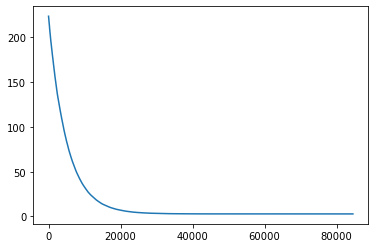

In [528]:
w, errors = stochastic_gradient_descent(X, y, w_init=np.zeros(X.shape[1]), max_iter = 100000,eta=1e-2, min_weight_dist=1e-8, verbose=True)
print('w', w)
plt.plot(errors)
plt.show()

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [467]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init=np.zeros(X.shape[1]), max_iter = 100000,eta=1e-2, min_weight_dist=1e-9, verbose=False)

IntProgress(value=0)

CPU times: user 6.87 s, sys: 67.7 ms, total: 6.94 s
Wall time: 7.11 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Text(0, 0.5, 'MSE')

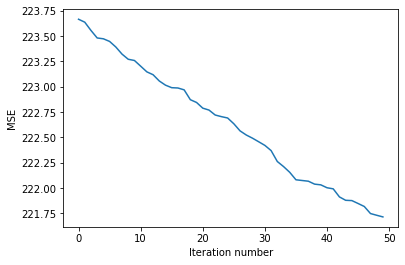

In [468]:
%matplotlib inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Text(0, 0.5, 'MSE')

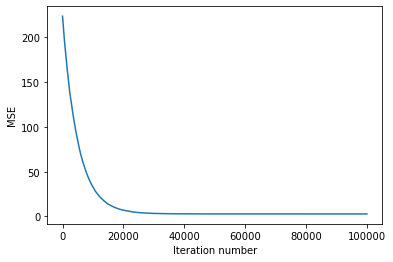

In [469]:

plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [470]:
stoch_grad_desc_weights

array([ 3.94909051,  2.76783154, -0.04537644, 14.01961683])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [471]:
stoch_errors_by_iter[-1]

2.78636911668712

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [472]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(round(answer4, 3))

2.786


In [473]:
!echo '2.786' > 4.txt

In [504]:
print('W', W)
print('SGD_W', stoch_grad_desc_weights)

W [ 3.91925365  2.79206274 -0.02253861 14.0225    ]
SGD_W [ 3.94909051  2.76783154 -0.04537644 14.01961683]
